In [1]:
import numpy as np
def transform( a ,alpha, d , theta ):
    #    alpha , theta = sp.radians(alpha) , sp.radians(theta)
        T = sp.Matrix ([ [ sp.cos(theta)              , -1*sp.sin(theta)           ,      0          ,    a              ],
                        [ sp.sin(theta)*sp.cos(alpha) , sp.cos(theta)*sp.cos(alpha) , -1*sp.sin(alpha) , -1*sp.sin(alpha)*d ],
                        [ sp.sin(theta)*sp.sin(alpha) , sp.cos(theta)*sp.sin(alpha) ,    sp.cos(alpha) ,    sp.cos(alpha)*d ],
                        [ 0                         , 0                         ,    0            ,  1                ]])
        return T

# Q 1

a formula that transforms an inertia tensor given in some frame {C}
into a new frame {A}. The frame {A} can differ from frame {C} by both
translation and rotation. You may assume that frame {C} is located at the
center of mass

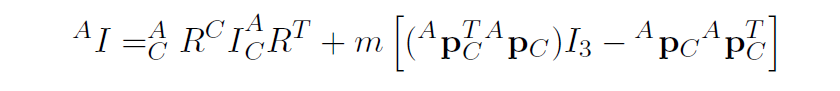

# Q1 b

Compute the inertia tensor of the box in frame {C}.

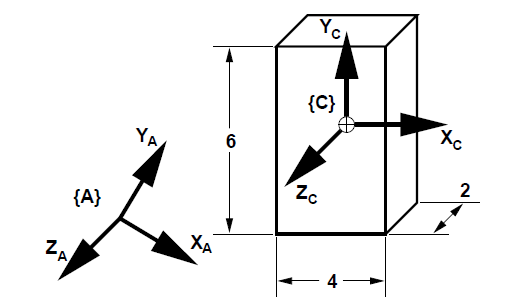

for Inertia Tensor in its frame 

In [2]:
import sympy as sp

In [3]:
m = 12 # kg
a , b, c = 4 ,6,2

In [4]:
CI = m/12 * sp.Matrix( [[b**2+c**2 , 0, 0],[0,a**2+c**2,0],[0,0,a**2+b**2]])

In [5]:
CI

Matrix([
[40.0,    0,    0],
[   0, 20.0,    0],
[   0,    0, 52.0]])

# Q1 c

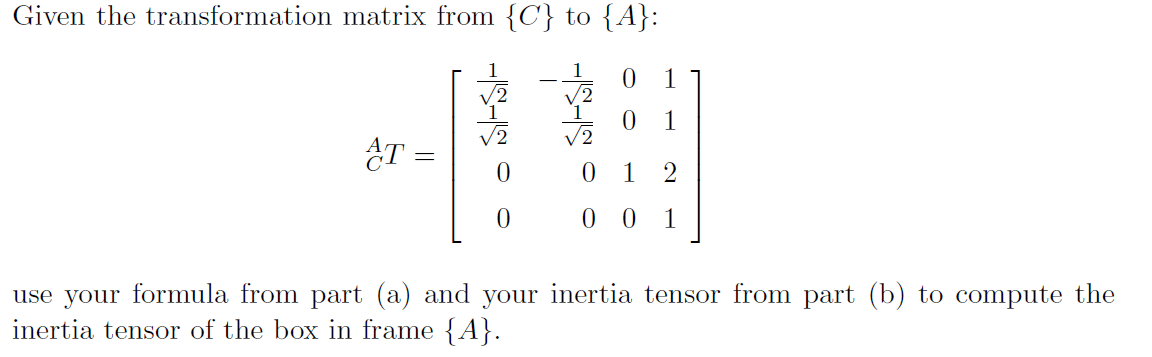

In [6]:
Rac = sp.Matrix([ [1/(2**0.5),-1*1/(2**0.5) , 0],[1/(2**0.5) ,1/(2**0.5) , 0],[0,0,1] ])

In [7]:
Pc = sp.Matrix([1,1,2])
var = (Pc.T*Pc)[0]
I = sp.Matrix([[var,0,0],[0,var,0],[0,0,var]])
I

Matrix([
[6, 0, 0],
[0, 6, 0],
[0, 0, 6]])

In [8]:
# using formula 
AI = Rac*CI*Rac.T + m*( I - Pc*Pc.T)
AI

Matrix([
[90.0, -2.0,  -24],
[-2.0, 90.0,  -24],
[ -24,  -24, 76.0]])

# Q2 a

In the rest of this problem set, we will walk through the process of finding the
equations of motion for a simple manipulator from the Lagrange formulation.
Consider the RP spatial manipulator shown below. The links of this manipulator
are modeled as bars of uniform density, having square cross-sections of thickness
h, lengths of L1 and L2, and total masses of m1 and m2, with centers of mass
shown. Assume that the joints themselves are massless.

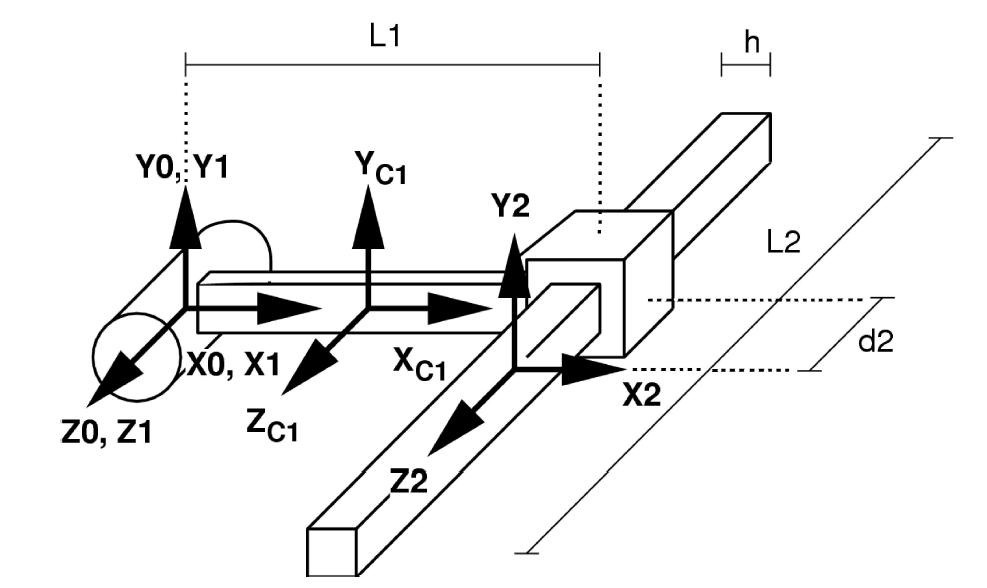

a) For each link i, we have attached a frame {Ci} to the center of mass (in this
case, frame {2} is the same as {C2}). Compute kinematics for these frames:
that is, calculate the matrices 0
C1T and 0
C2T.

In [46]:
t1 = sp.symbols("theta1")
d2 = sp.symbols("d2")
L1 = sp.symbols("L1")
L2 = sp.symbols("L2")
h = sp.symbols('h')
m1 = sp.symbols('m1')
m2 = sp.symbols('m2')
t1_dot = sp.symbols("thetadot1")
d2_dot = sp.symbols('ddot2')
t1_dot_dot = sp.symbols("thetadotdot1")
d2_dot_dot = sp.symbols('ddotdot2')
g = sp.symbols('g')

# a


In [10]:
T01 = transform(0,0,0,t1)
T12 = transform(L1 , 0,d2,0)
T1C1 = transform(L1/2,0,0,0)
T0C1 = T01*T1C1
T0C2 = T01 * T12

In [11]:
T0C1

Matrix([
[cos(theta1), -sin(theta1), 0, L1*cos(theta1)/2],
[sin(theta1),  cos(theta1), 0, L1*sin(theta1)/2],
[          0,            0, 1,                0],
[          0,            0, 0,                1]])

In [12]:
T0C2

Matrix([
[cos(theta1), -sin(theta1), 0, L1*cos(theta1)],
[sin(theta1),  cos(theta1), 0, L1*sin(theta1)],
[          0,            0, 1,             d2],
[          0,            0, 0,              1]])

# b

In [13]:
Jv1 = sp.Matrix([
    [ sp.diff(T0C1[0,-1],t1) , sp.diff(T0C1[1,-1],t1) , 0 ],
    [ 0, 0, 0]
]).T        

Jv2 = sp.Matrix([
    [ sp.diff(T0C2[0,-1],t1) , sp.diff(T0C2[1,-1],t1) , 0 ],
    [ 0, 0, sp.diff(T0C2[2,-1],d2)]
]).T

In [14]:
Jv1

Matrix([
[-L1*sin(theta1)/2, 0],
[ L1*cos(theta1)/2, 0],
[                0, 0]])

In [15]:
Jv2

Matrix([
[-L1*sin(theta1), 0],
[ L1*cos(theta1), 0],
[              0, 1]])

# c

In [16]:
Jw1 = sp.Matrix([[0,0,1],[0,0,0]]) # rotation about only z axis
Jw2 = sp.Matrix([[0,0,1],[0,0,0]])

In [17]:
Jw1

Matrix([
[0, 0, 1],
[0, 0, 0]])

In [18]:
Jw2

Matrix([
[0, 0, 1],
[0, 0, 0]])

# d

In [19]:
Ic1 =m1/12* sp.Matrix([
    [2*h**2 ,0,0],
    [0 ,L1**2+h*h,0],
    [0,0,L1*L1+h*h]
])
Ic2 =m2/12* sp.Matrix([
    [L2*L2+h*h ,0,0],
    [0 ,L1*L1+h*h,0],
    [0,0,2*h*h]
])

In [20]:
Ic1

Matrix([
[h**2*m1/6,                    0,                    0],
[        0, m1*(L1**2 + h**2)/12,                    0],
[        0,                    0, m1*(L1**2 + h**2)/12]])

In [21]:
Ic2

Matrix([
[m2*(L2**2 + h**2)/12,                    0,         0],
[                   0, m2*(L1**2 + h**2)/12,         0],
[                   0,                    0, h**2*m2/6]])

# e

Calculate the mass matrix, M(q). To make your algebra easier, leave the inertia tensors
in symbolic form until the end, i.e.

In [28]:
m_m = m1*Jv1.T*Jv1 + m2*Jv2.T*Jv2 + Jw1*Ic1*Jw1.T + Jw2*Ic2*Jw2.T

In [29]:
sp.simplify(m_m)

Matrix([
[L1**2*m1/3 + L1**2*m2 + h**2*m1/12 + h**2*m2/6,  0],
[                                             0, m2]])

# g

calculation of V(q,q_dot)

In [33]:
C = 0.5*sp.Matrix([
    [sp.diff(m_m[0,0],t1_dot) , 2*sp.diff(m_m[0,1],d2_dot) - sp.diff(m_m[1,1] , t1_dot)],
    [2*sp.diff(m_m[1,0],t1_dot)-sp.diff(m_m[0,0],d2_dot) ,sp.diff(m_m[1,1],d2_dot)  ]
])
C

Matrix([
[0, 0],
[0, 0]])

In [35]:
B = sp.Matrix([
    [sp.diff(m_m[0,0],d2_dot)],
    [sp.diff(m_m[1,0],d2_dot)+sp.diff(m_m[1,1],t1_dot)-sp.diff(m_m[0,1],d2_dot)]
])
B

Matrix([
[0],
[0]])

# h

(h) Calculate, 0G(q), the gravity vector in frame {0}, in terms of the masses,
the configuration q, and the gravity constant g (g is positive). Assume that
gravity pulls things along the −z0 direction. Be careful with your signs.

In [44]:
g_vect = sp.Matrix([ [0] ,[0],[-1*g]])
g_vect

Matrix([
[ 0],
[ 0],
[-g]])

In [45]:
G = -1*( Jv1.T*m1*g_vect + Jv2.T*m2*g_vect )
G

Matrix([
[   0],
[g*m2]])

# i

As a final step, use your answers to parts (e), (g) and (h) to write out the
equations of motion as two great big equations

In [47]:
q_dot_dot = sp.Matrix([[t1_dot_dot , d2_dot_dot]]).T
# since C and B are zero matrix so we are not declering the symbols for q^2 and q.q matrix

In [48]:
Torque = m_m*q_dot_dot + G

In [50]:
sp.simplify(Torque)

Matrix([
[thetadotdot1*(4*L1**2*m1 + 12*L1**2*m2 + h**2*m1 + 2*h**2*m2)/12],
[                                               m2*(ddotdot2 + g)]])

In [52]:
tou1 = sp.simplify(Torque[0])
tou2 = sp.simplify(Torque[1])

In [53]:
tou1

thetadotdot1*(4*L1**2*m1 + 12*L1**2*m2 + h**2*m1 + 2*h**2*m2)/12

In [54]:
tou2

m2*(ddotdot2 + g)